In [1]:
### Print not only the last line in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
sys.path.insert(0,'/afs/cern.ch/user/a/anpotreb/top/JERC/JMECoffea')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from coffea import util
# %matplotlib notebook 
# %matplotlib notebook 

In [4]:
from .plotters import plotters

ImportError: attempted relative import with no known parent package

In [1]:
from ..helpers import hist_add, hist_mult, hist_div, dictionary_pattern, sum_subhist, xsecstr2float

ImportError: attempted relative import with no known parent package

In [3]:
from helpers import hist_add, hist_mult, hist_div, dictionary_pattern, sum_subhist, xsecstr2float

In [3]:
# add_tag = '_QCD-JME-leading3jets' #-etaAut18'
# add_tag = '_QCD-JME' #-etaAut18'
add_tag = '_QCD_MG_Py8'
add_tag = '_Herwig-QCD'

tag_full = '_L5'+add_tag
outname = '../out/CoffeaJERCOutputs'+tag_full+'.coffea'
output = util.load(outname)

In [5]:
dataset = 'fileNames/QCD_MG_Py8_20UL18/xsecs_QCD_MG_py8.txt'
if "Herwig-QCD" in add_tag or "MG" in add_tag:
#     dataset_list_file = '../fileNames/QCD_MG_Py8_20UL18/xsecs_QCD_MG_py8.txt'
    dataset_list_file = '../fileNames/QCD_Herwig_20UL18/xsecs_QCD_Herwig_corrected.txt'
#     dataset_list_file = '../fileNames/xsecs_QCD_Herwig.txt'
    with open(dataset_list_file) as f:
        lines = f.readlines()
    lines_split = [line.split() for line in lines]
    file_dict = {lineii[1]: xsecstr2float(lineii[2]) for lineii in lines_split }
else:
    file_dict = 1

In [6]:
file_dict
file_dict2 = file_dict
# file_dict2 = {
#     "HT50to100": 56530.0,
#     "HT100to200": 11370.0*0.95,
#     "HT200to300": 883.5*1.1,
#     "HT300to500": 259.6*0.93,
#     "HT500to700": 23.63*1.06,
#     "HT700to1000": 4.943*1.15,
#     "HT1000to1500": 0.8013*1.35,
#     "HT1500to2000": 0.06815*1.6,
#     "HT2000toInf": 0.01245*1.75,
# }

{'HT50to100': 56530.0,
 'HT100to200': 10801.5,
 'HT200to300': 971.85,
 'HT300to500': 241.42800000000003,
 'HT500to700': 25.0478,
 'HT700to1000': 5.684449999999999,
 'HT1000to1500': 1.081755,
 'HT1500to2000': 0.10904000000000001,
 'HT2000toInf': 0.021787499999999998}

In [11]:
# get the weight sum of all the "ptresponse_" histograms in the sample
response_sums = {key:sum(dictionary_pattern(output[key], "ptresponse_").values()).sum().value for key in output.keys()}
scale_factors = hist_div(file_dict2, response_sums)

In [12]:
output_orig = output
if 'Herwig-QCD' in add_tag or "MG" in add_tag:
    all_histo_keys = output[next(iter(output.keys()))].keys()
    result = {histo_key:sum_subhist(output, histo_key, scale_factors) for histo_key in all_histo_keys }
    output = result
else:
    output = output[list(output.keys())[0]]

In [13]:
# sums['b']+=2

In [14]:
# sums = {'b':0, 'g':0}
# sums = {key:0 for key in ['q', 'g', 'b', 'c', 'untagged']}
# sums_hist = {key:0 for key in ['q', 'g', 'b', 'c', 'untagged']}
# sums_hist_raw = {key:0 for key in ['q', 'g', 'b', 'c', 'untagged']}
# for key in li:
#     out_tmp = output_orig[key] 
#     q_hist = (out_tmp['ptresponse_u']+out_tmp['ptresponse_ubar']+out_tmp['ptresponse_d']+out_tmp['ptresponse_dbar']+out_tmp['ptresponse_s']+out_tmp['ptresponse_sbar'])[:,sum,sum]
#     g_hist = (out_tmp['ptresponse_g'])[:,sum,sum]
#     b_hist = (out_tmp['ptresponse_b']+out_tmp['ptresponse_bbar'])[:,sum,sum]
#     c_hist = (out_tmp['ptresponse_c']+out_tmp['ptresponse_cbar'])[:,sum,sum]
#     untagged_hist = (out_tmp['ptresponse_untagged'])[:,sum,sum]
#     sums['q']+=q_hist.values()*file_dict2[key]
#     sums['g']+=g_hist.values()*file_dict2[key]
#     sums['b']+=b_hist.values()*file_dict2[key]
#     sums['c']+=c_hist.values()*file_dict2[key]
#     sums['untagged']+=untagged_hist.values()*file_dict2[key]
    
#     for histii, samp in zip([q_hist, g_hist, b_hist, c_hist, untagged_hist], ['q', 'g', 'b', 'c', 'untagged']):
#         sums_hist[samp]+=histii*file_dict2[key]
        
#     sums_hist_raw['g']+=out_tmp['ptresponse_g']*file_dict2[key]
    
#     print(key, ", " , output_orig[key]['ptresponse_b'][14:17,sum,sum].values()*file_dict2[key], ", " , output_orig[key]['ptresponse_g'][14:17,sum,sum].values()*file_dict2[key])
#     #     output_orig['HT50to100']['ptresponse_b'][14:17,sum,sum].values()
# #     output_orig['HT100to200']['ptresponse_b'][14:17,sum,sum].values()
# #     sums['b']+=output_orig[key]['ptresponse_b'][14:17,sum,sum].values()*file_dict2[key]
# #     sums['g']+=output_orig[key]['ptresponse_g'][14:17,sum,sum].values()*file_dict2[key]

In [15]:
for key in output.keys():
    if 'response' in key:
        response_key = key
        break

In [16]:
fine_etabins=False
one_bin=False
if fine_etabins==True:
    ptbins = np.array([15, 40, 150, 400, 4000, 10000])
    ptbins_c = (ptbins[:-1]+ptbins[1:])/2
    etabins = output[response_key].axes["jeteta"].edges #output['ptresponse'].axis('jeteta').edges()
elif one_bin==True:
    ptbins = np.array([15, 10000])
    ptbins_c = (ptbins[:-1]+ptbins[1:])/2
    etabins = np.array([-5, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5])
    etabins = np.array([etabins[0], 0, etabins[-1]])
#     etabins = np.array([etabins[3], 0, etabins[-4]])
else:
    ptbins = output[response_key].axes["pt_gen"].edges 
#     ptbins = ptbins[2:] #because there is a pt cut on pt gen and no point of fitting and plotting below that
    ptbins_c = output[response_key].axes['pt_gen'].centers
#     etabins = np.array([-5.191, -3.489, -3.139, -2.853,   -2.5, -2.322,  -1.93, -1.653, -1.305, -0.783,      0,  0.783,  1.305,  1.653,   1.93,  2.322,    2.5,  2.853,  3.139,  3.489, 5.191])
    etabins = np.array([-5.191, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5.191])

### Square style

In [24]:
all_samples = [key[11:] for key in output.keys() if 'ptresponse' in key]
# (output['ptresponse_u']+output['ptresponse_ubar']+output['ptresponse_d']+output['ptresponse_dbar'])[:,sum,sum]
q_hist = (output['ptresponse_u']+output['ptresponse_ubar']+output['ptresponse_d']+output['ptresponse_dbar']+output['ptresponse_s']+output['ptresponse_sbar'])[:,sum,sum]
g_hist = (output['ptresponse_g'])[:,sum,sum]
b_hist = (output['ptresponse_b']+output['ptresponse_bbar'])[:,sum,sum]
c_hist = (output['ptresponse_c']+output['ptresponse_cbar'])[:,sum,sum]
untagged_hist = (output['ptresponse_untagged'])[:,sum,sum]

all_responses = {samp:output['ptresponse_'+samp] for samp in all_samples}
all_hist = sum(all_responses.values())[:,sum,sum]

In [26]:
from pltStyle import pltStyle
# from pltStyle import cols_cyc
pltStyle(style='presentation-square')
# plt.rcParams['figure.subplot.left'] = 0.162
# plt.rcParams['figure.dpi'] = 150

/tmp/anpotreb/ipykernel_14393/1900336115.py:7: RuntimeWarning: invalid value encountered in true_divide
  q_frac = (q_hist.values()/allhistval)[plot_range]
/tmp/anpotreb/ipykernel_14393/1900336115.py:8: RuntimeWarning: invalid value encountered in true_divide
  g_frac = (g_hist.values()/allhistval)[plot_range]
/tmp/anpotreb/ipykernel_14393/1900336115.py:9: RuntimeWarning: invalid value encountered in true_divide
  b_frac = (b_hist.values()/allhistval)[plot_range]
/tmp/anpotreb/ipykernel_14393/1900336115.py:10: RuntimeWarning: invalid value encountered in true_divide
  c_frac = (c_hist.values()/allhistval)[plot_range]
/tmp/anpotreb/ipykernel_14393/1900336115.py:11: RuntimeWarning: invalid value encountered in true_divide
  unt_frac = (untagged_hist.values()/allhistval)[plot_range]


Saving plot with the name =  ../fig/fractions/fraction_L5_Herwig-QCD


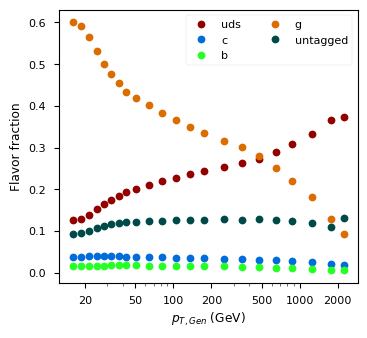

In [27]:
# allhistval = (q_hist.values()**2/q_hist.variances()+g_hist.values()**2/g_hist.variances()+b_hist.values()**2/b_hist.variances()+c_hist.values()**2/c_hist.variances()+untagged_hist.values()**2/untagged_hist.variances())
allhistval = q_hist.values()+g_hist.values()+b_hist.values()+q_hist.values()+c_hist.values()+untagged_hist.values()

plot_range = range(0, len(ptbins_c)-6)
# ptbins_c[plot_range]
ptbins_c_plot = ptbins_c[plot_range]
q_frac = (q_hist.values()/allhistval)[plot_range]
g_frac = (g_hist.values()/allhistval)[plot_range]
b_frac = (b_hist.values()/allhistval)[plot_range]
c_frac = (c_hist.values()/allhistval)[plot_range]
unt_frac = (untagged_hist.values()/allhistval)[plot_range]

fig, ax = plt.subplots()
ax.plot(ptbins_c_plot, q_frac, 'o', label="uds")
ax.plot(ptbins_c_plot, c_frac, 'o', label="c")
ax.plot(ptbins_c_plot, b_frac, 'o', label="b")
ax.plot(ptbins_c_plot, g_frac, 'o', label="g")
ax.plot(ptbins_c_plot, unt_frac, 'o', label="untagged")
ax.set_xscale('log')
ax.set_xlabel('$p_{T,Gen}$ (GeV)')
ax.set_ylabel("Flavor fraction")
# fig.suptitle("Blaaah $x^2_5$")

xlims = ax.get_xlim()

ax.set_xticks([])
ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
leg1 = ax.legend(ncol=2)

ax.set_xlim(xlims)

import os
if not os.path.exists("../fig/fractions"):
    os.mkdir("../fig/fractions")
    
fig_name = '../fig/fractions/fraction'+tag_full
print("Saving plot with the name = ", fig_name)
plt.savefig(fig_name+'.pdf');
plt.savefig(fig_name+'.png');

# ptbins_c
1;